In [1]:
library(tidyverse)
options(jupyter.plot_mimetypes="image/png")
options(repr.plot.width=4, repr.plot.height=3)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.0     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


# Lecture 01: Getting to know ``ggplot``

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for today's lecture:**

After today's lecture you will understand how to:

* Use the ``ggplot2`` package to produce simple plots.
* Use the `filter` command to do basic data filtering.
* Understand the basics of [aesthetic mappings](#Aesthetic-Mappings).

</div>

### Review (from last lecture)
Anatomy of a ggplot command:
```r
ggplot(data = <DATA>) +
    <GEOM_FUNCTION>(mapping = aes(<AESTHETICS>))
```

### Getting help
R has very comprehensive built-in help system that can tell you more about what commands do. The syntax for accessing it is:
```{r}
?command_name
```

In [61]:
??smooth

Data visualization is an important skill to master as a data scientist. There are several tools available for data visualization. There are paid services/products offered by companies like [Tableau](https://www.tableau.com/) that let people generate high quality visualizations from data stored in speadsheets and databases. [D3.js](https://d3js.org/) is a Javascript library that uses a browser to display high quality, interactive graphics. Spreadsheet programs, such as Microsoft Excel, also offer visualization tools.

Since this is a course based on the R language, we will explore the visualization tools provided by the R language and packages. Even if we restrict ourselves to R, we have a few choices. The [R base graphics package](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/00Index.html) provides basic plotting tools that may be sufficient for many purposes. We will look at the [ggplot2 package](http://ggplot2.org/) that offers a higher level of abstraction to create graphics. For an interesting comparison between base R graphics and ggplots, see this [blog post](https://flowingdata.com/2016/03/22/comparing-ggplot2-and-r-base-graphics/).


Let us start by revisiting the **mpg** data set that we saw in the last lecture.

Recall the **mpg** data frame.

In [2]:
print(mpg)

# A tibble: 234 x 11
   manufacturer model   displ  year   cyl trans   drv     cty   hwy fl    class
   <chr>        <chr>   <dbl> <int> <int> <chr>   <chr> <int> <int> <chr> <chr>
 1 audi         a4        1.8  1999     4 auto(l… f        18    29 p     comp…
 2 audi         a4        1.8  1999     4 manual… f        21    29 p     comp…
 3 audi         a4        2    2008     4 manual… f        20    31 p     comp…
 4 audi         a4        2    2008     4 auto(a… f        21    30 p     comp…
 5 audi         a4        2.8  1999     6 auto(l… f        16    26 p     comp…
 6 audi         a4        2.8  1999     6 manual… f        18    26 p     comp…
 7 audi         a4        3.1  2008     6 auto(a… f        18    27 p     comp…
 8 audi         a4 qua…   1.8  1999     4 manual… 4        18    26 p     comp…
 9 audi         a4 qua…   1.8  1999     4 auto(l… 4        16    25 p     comp…
10 audi         a4 qua…   2    2008     4 manual… 4        20    28 p     comp…
# ... with 224 more

A fundamental type of plot is a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot). It can be used to examine the relationship between 2 variables. Cartesian coordinates are used with one variable plotted along the x-axis and the other plotted along the y-axis. Let us create a scatter plot of the engine displacement **displ** (in liters) versus the highway mileage **hwy** (in mpg).

### Exercise (from last lecture)
Produce this plot:
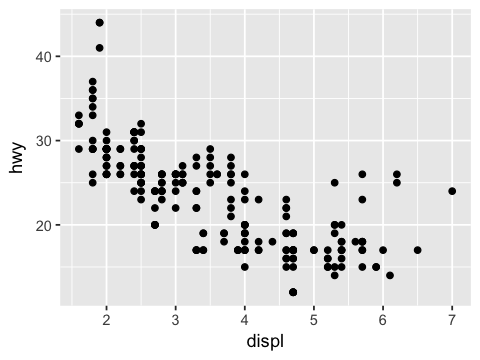

In [64]:
?ggplot

As we would expect, there seems to be a trend whereby bigger engines (larger displacment) gets worse gas mileage. Let's check this by adding a smoothed line-of-best-fit to the plot. 

To save myself some typing I'll move the aesthetic into the main ``ggplot()`` command -- this makes it the default aesthetic for every ``geom()``, a.k.a. the **global aesthetic**.

### Reproduce the plot
(Use `geom_smooth`).
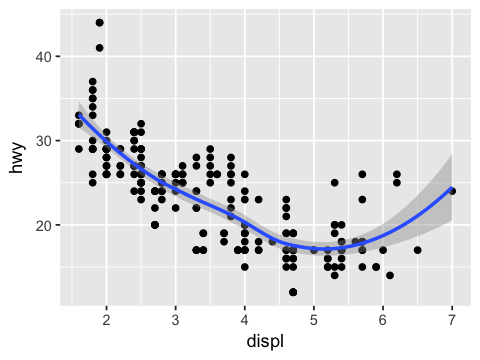

`geom_smooth()` using method = 'loess'


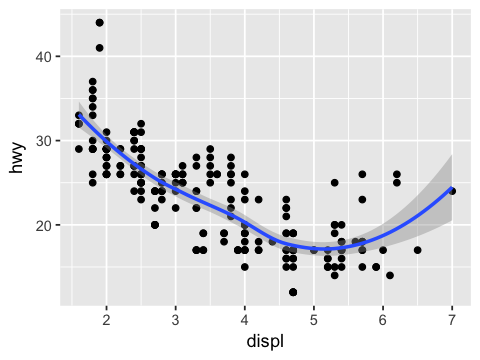

In [68]:
ggplot(mpg, mapping = aes(x = displ, y = hwy)) + geom_point() + geom_smooth()

Sure enough, there's a declining relationship up to about 5L engine displacement. The uptick seems to be driven by small cloud of outlying points which get 23-26mpg and have an engine displacement of 5-7L. To figure out what these are, we can filter the data by these criteria:

### Exercise
Complete the command below to keep only the observations that have a highway mileage of 23-26mpg and a displacement of 5-7L:
```
filter(mpg, hwy >= 23, ...)
```
You should get a table that looks like:
```
# A tibble: 6 x 11
  manufacturer model      displ  year   cyl trans drv     cty   hwy fl    class
  <chr>        <chr>      <dbl> <int> <int> <chr> <chr> <int> <int> <chr> <chr>
1 chevrolet    corvette     5.7  1999     8 manu… r        16    26 p     2sea…
2 chevrolet    corvette     5.7  1999     8 auto… r        15    23 p     2sea…
3 chevrolet    corvette     6.2  2008     8 manu… r        16    26 p     2sea…
4 chevrolet    corvette     6.2  2008     8 auto… r        15    25 p     2sea…
5 chevrolet    corvette     7    2008     8 manu… r        15    24 p     2sea…
6 pontiac      grand prix   5.3  2008     8 auto… f        16    25 p     mids…
```

In [85]:
filter(mpg, displ >= 5 | cty >= 15 | hwy >= 23)

    manufacturer model              displ year cyl trans      drv cty hwy fl
1   audi         a4                 1.8   1999 4   auto(l5)   f   18  29  p 
2   audi         a4                 1.8   1999 4   manual(m5) f   21  29  p 
3   audi         a4                 2.0   2008 4   manual(m6) f   20  31  p 
4   audi         a4                 2.0   2008 4   auto(av)   f   21  30  p 
5   audi         a4                 2.8   1999 6   auto(l5)   f   16  26  p 
6   audi         a4                 2.8   1999 6   manual(m5) f   18  26  p 
7   audi         a4                 3.1   2008 6   auto(av)   f   18  27  p 
8   audi         a4 quattro         1.8   1999 4   manual(m5) 4   18  26  p 
9   audi         a4 quattro         1.8   1999 4   auto(l5)   4   16  25  p 
10  audi         a4 quattro         2.0   2008 4   manual(m6) 4   20  28  p 
11  audi         a4 quattro         2.0   2008 4   auto(s6)   4   19  27  p 
12  audi         a4 quattro         2.8   1999 6   auto(l5)   4   15  25  p 

It would be helpful to somehow visualize the class of the auto alongside the data on mileage and displacement. To add this information in to the plot, we'll add another aesthetic called ``color=``:

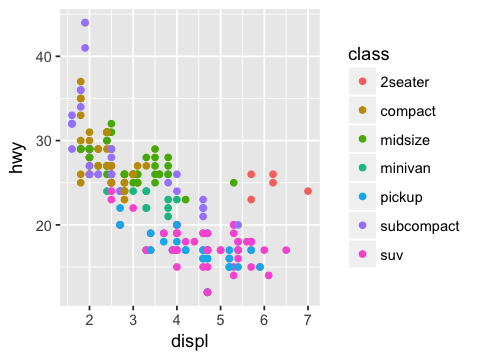

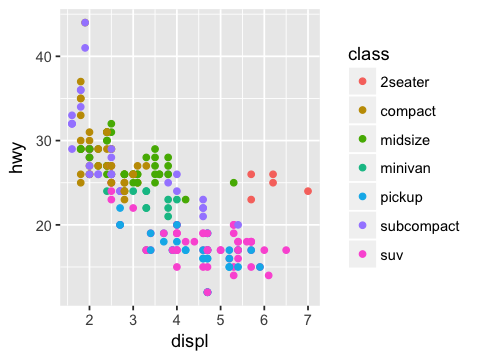

In [70]:
ggplot(data = mpg) + geom_point(mapping = aes(x=displ, y=hwy, color = class))

Note what ggplot did for us. It chose a unique value of **color** for a unique value of **class** and also displayed a legend explaining the choices.

This confirms our hypothesis, although maybe like me you were expected the outliers to be some sort of hybrid. Let us see how the line of best fit looks if we drop the outlying ``'2seater'`` class:
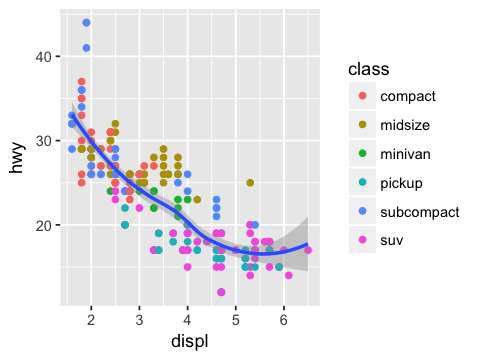

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


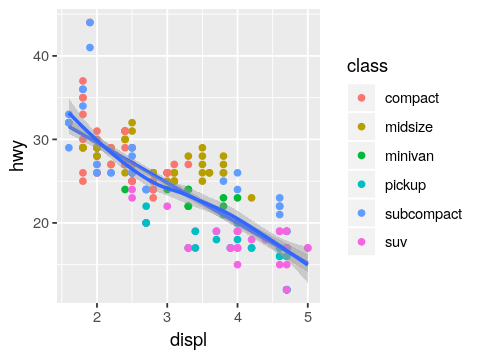

In [3]:
mpg_filter = filter(mpg, displ <= 5)
ggplot(mpg_filter, aes(x = displ, y = hwy)) + geom_point(aes(color = class)) + 
    geom_smooth(method="lm") +  geom_smooth()

Whoops. What happened here is that adding a factor to the ``color=`` aesthetic told ``ggplot`` to make a new color of line for each different class. With more data this could be interesting, but since we have so few examples in each class, there's not really any point in smoothing over them individually. What we really want are the points to be colored, but just one line plotted. We can achieve this my moving the ``color=`` option into the aesthetic for the ``geom_point()``:

`geom_smooth()` using method = 'loess'


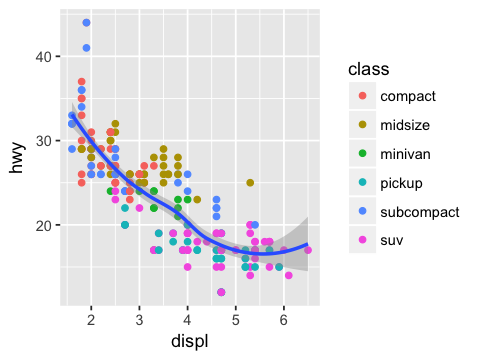

In [23]:
ggplot(data=filter(mpg, class!='2seater'), aes(x=displ, y=hwy)) + 
    geom_point(aes(color=class)) + geom_smooth() # move the color= option into geom_point to avoid clutter

If we wanted to fit the line for only one class of cars, say ``subcompact``, we pass a filtered dataset to the ``geom_smooth`` command:
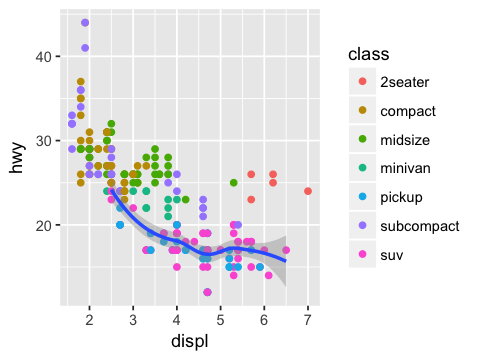

`geom_smooth()` using method = 'loess'


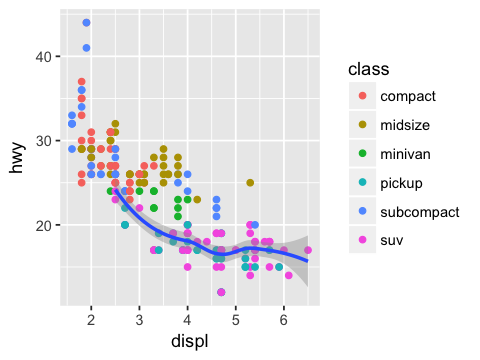

In [98]:
ggplot(data=filter(mpg, class != '2seater'), aes(x=displ, y=hwy)) +
   geom_point(aes(color=class)) + geom_smooth(data = filter(mpg, class == "suv"))

# Aesthetic Mappings
What you have just seen are examples of how to manipulate **aes**thetic mappings. Let us pay close attention to the syntax here. It has the form:

```r
ggplot(data = <DATA>, aes=(<MAPPINGS>)) +
    <GEOM_FUNCTION>(data = <OTHER DATA>, 
    mapping = aes(<OTHER MAPPINGS>))
```

An important point is that the ``data=`` and ``mapping=`` parameters given to ``ggplot()`` will be the defaults
for all the other geoms, *unless* you override them by specifying individual values at each level.

### Exercise
Reproduce the plot, which maps the **class** variable to the **shape** aesthetic:
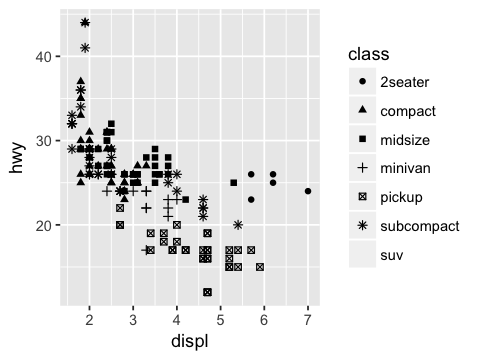

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 62 rows containing missing values (geom_point).”

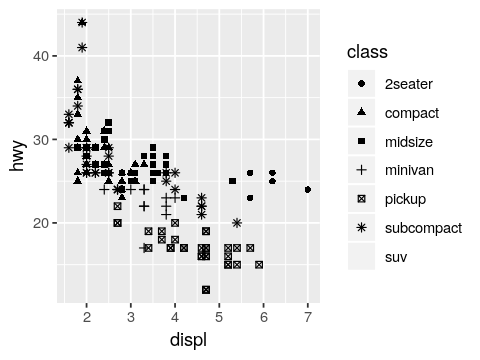

In [4]:
ggplot(data=mpg, mapping=aes(x=displ, y=hwy)) + geom_point(mapping=aes(shape=class))

We get a warning since, by default, only 6 shapes are used at a time but the **class** variable takes 7 values. In our case, points with SUV class went unplotted.

It makes more sense to map a continuous variable like **cty** (city mileage) to a continuous aesthetic **size**.

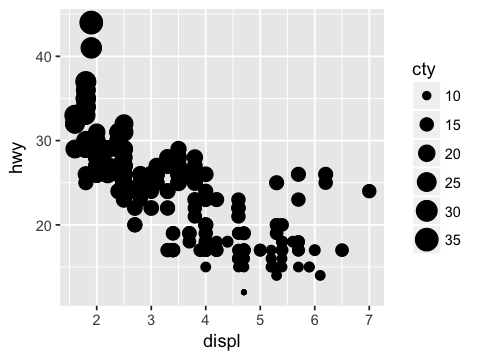

In [103]:
ggplot(data = mpg) +  # sized by city gas mileage
    geom_point(mapping = aes(x = displ, y = hwy, 
                             size = cty))

In lecture 00 we noted that some plots are *overplotted* (have overlapping data points). We can see this in the preceding plot by using the `alpha=` parameter to make each point transparent:

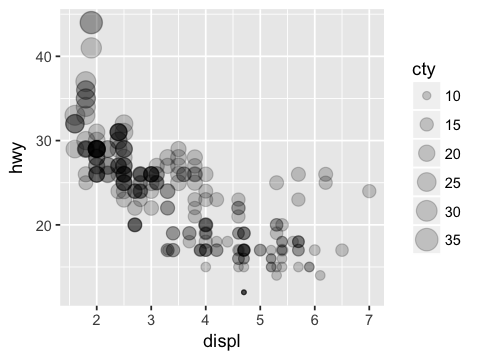

In [107]:
ggplot(data = mpg) +  # sized by city gas mileage
    geom_point(mapping = aes(x = displ, y = hwy, size = cty), alpha=.2)

An alternative is to use a *jitter plot*, which jitters (adds a small amount of random noise) to each point.
### Exercise
Use `geom_jitter` to re-create this plot:
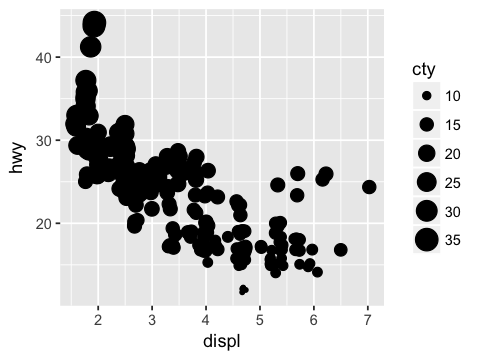

In [34]:
# Solution
ggplot(mpg) 

As expected, higher gas mileage on the hwy seems to be quite correlated with higher city mileage.

**color** is an interesting aesthetic. It works even when we map a continuous variable to it but it works differently for continuous and categorical variables.

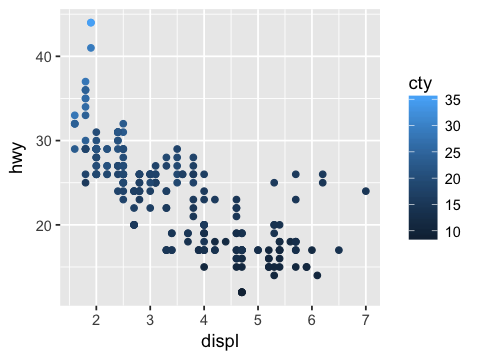

In [35]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, color = cty))

An aesthetic need not be mapped directly to a variable. For example, we can map the color aesthetic to TRUE/FALSE depending on whether the **year** variable has a value less than 2000 or not.

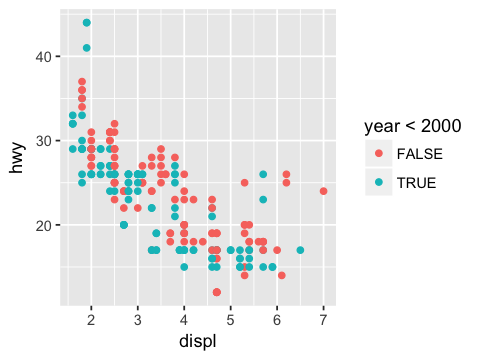

In [36]:
ggplot(data = mpg) +  # older cars get worse mileage
    geom_point(mapping = aes(x = displ, y = hwy, color = year < 2000))

Inspired by this plot, perhaps we want to plot **year** against mileage.

### Exercise
Make a plot of year vs. highway gas mileage.

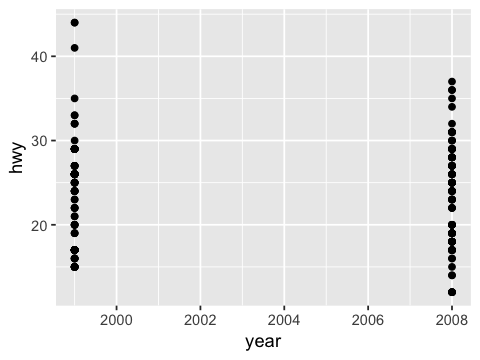

In [2]:
# Solution
ggplot(mpg) + geom_point(aes(year, hwy))

It turns out that there are only two years represented in the data, not really enought to paint a full picture over time. Instead we can treat year as a categorical variable and look at the distribution of **hwy** within each value of year. For this we will use a new geom called ``boxplot``:

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”

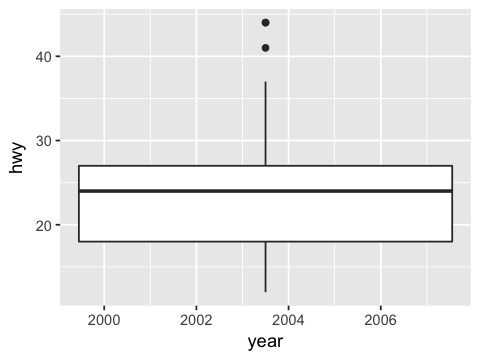

In [39]:
ggplot(data = mpg) +  # year vs. hwy. 
    geom_boxplot(mapping = aes(x=year, y=hwy))

This doesn't quite do what we want. Just like the warning message says, the problem is that the **year** variable is continuous. However since we have only a few different values of year in our data set, we need to tell R that we want to temporarily think of it as discrete. The way to do this is by converting **year** to a factor:

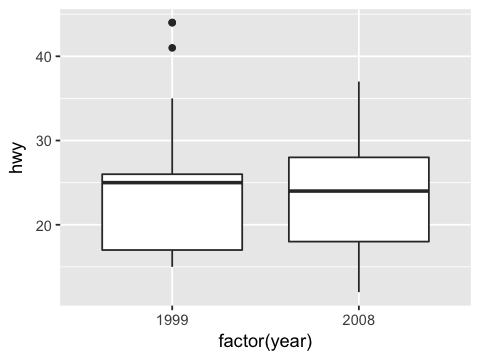

In [40]:
ggplot(data = mpg) +  # year vs. hwy. 
    geom_boxplot(mapping = aes(x=factor(year), y=hwy))  # convert year to factor

Surprisingly, the median highway gas mileage went down from 1999 to 2008. Why might this be? Let's try plotting the fraction of car types represented in each data set. To do this we will use use a new geom, `geom_bar`. This takes one aesthetic called `x=` and makes a plot with the number of times that each (discrete) value of `x` appears in the data set. Here is an example which counts the number of cars in each class:

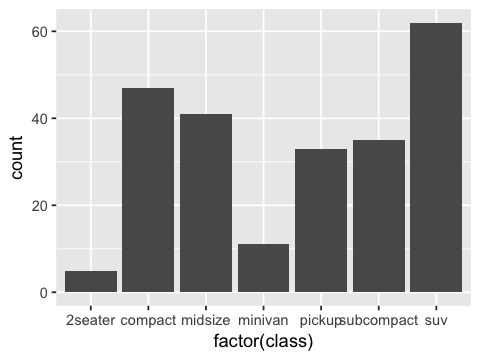

In [45]:
ggplot(mpg) + geom_bar(aes(x=factor(class)))

### Exercise
Use the `geom_bar` and the `fill=` aesthetic the make a plot of the number of different auto classes in 1999 vs. 2008:
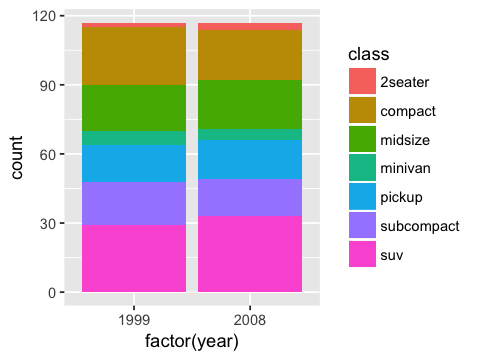

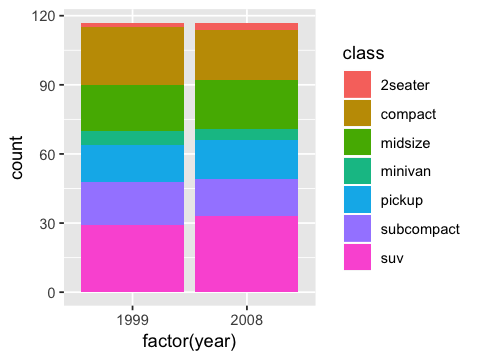

In [7]:
# Solution
ggplot(mpg) + geom_bar(aes(x = factor(year), fill = class))

## Other geoms
There are many other geoms in ``ggplot()`` (over 30). We will not have time to go over them all. If you want to learn about other types of plots and geoms, check out this [graphical glossary](https://www.r-graph-gallery.com/portfolio/ggplot2-package/). The nice thing about plotting using ``ggplot`` is that can completely alter the type and appearance of your plot by simply switching to another type of geom.

The list of available aesthetic mappings can vary from geom to geom. 

`geom_point` has the following aesthetics:

* `x` (required)
* `y` (required)
* `alpha`
* `color`
* `fill`
* `group`
* `shape`
* `size`
* `stroke`

`geom_smooth` has the following aesthetics:

* `x` (required)
* `y` (required)
* `alpha`
* `color`
* `fill`
* `group`
* `linetype`
* `size`
* `weight`
* `ymax`
* `ymin`

### Exercise
Map the **linetype** aesthetic to the **drv** variable, to generate a plot which assigns a different line type (dashed, dotted, solid, etc.) to each type of drivetrain:
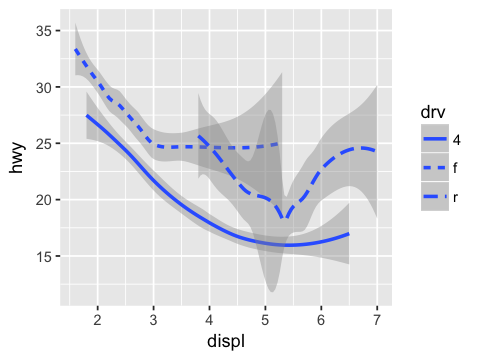

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


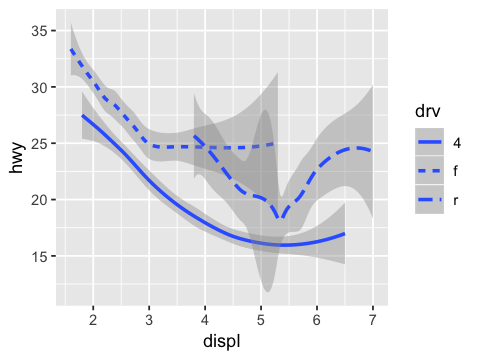

In [6]:
# Solution
ggplot(mpg) + geom_smooth(aes(x = displ, y = hwy, linetype = drv))